In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.preprocessing import scale
from sklearn import decomposition
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
!pip install scikit-multilearn
import skmultilearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,hamming_loss,classification_report
from sklearn.model_selection import train_test_split
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from farasa.stemmer import FarasaStemmer
stemmer = FarasaStemmer(interactive=True)
!pip install farasapy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[2021-09-22 14:49:30,838 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


#Discovering the training dataset

In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/Capstone Project/test.csv", sep="\t", header=0)
df_train = pd.read_csv("/content/drive/MyDrive/Capstone Project/train.csv", sep="\t", header=0)
df_demo = pd.read_excel("/content/drive/MyDrive/Capstone Project/demo-test.xlsx")

In [ ]:
df_demo

,باسل مطور ويب، ومناصر للمعرفة المفتوحة، والمنسق السابق للمشاع الإبداعي في سوريا، هو أيضًا صديق مقرب للأصوات العالمية، والمشاع الإبداعي، ومنظمة تبادل الإعلام الاجتماعي. نسأل أصدقائنا ومعارفنا مساعدتهم في دعم باسل عبر الطرق التالية:تهدف مكتبة الحرية لباسل إنشاء إنترنت “واقعيّ” لباسل، وذلك عبر جمع الأخبار والتعليقات، والأعمال الفنية وكل ما يمكن طباعته عن الثلاث سنوات الماضية. قم بزيارة مكتبة الحرية لباسل على تمبلر وساهم في بنائها!ساهم مع المشاع الإبداعي ومؤسسة الجبهة الإلكترونية في ماراثون التحرير لتحديث المعلومات ووضع المراجع لباسل على الإنترنت


In [ ]:
all = pd.concat((df_test,df_train), axis =0 )

In [ ]:
all['initial'][10]

10    يشارك موقع OpenDemocracy قائمته لأفضل المدوّنا...
10    نشر الموضوع لأول مرة على موقع رصيف22، وتعيد ال...
Name: initial, dtype: object

In [ ]:
all.head()

,COVID-19,آداب,أصالة,أفكار,أفلام,احتجاج,الإعلام والصحافة,النساء والنوع,النشاط الرقمي,تقنية,حروب ونزاعات,حرية التعبير,حقوق الإنسان,حكم,سياسة,صحافة المواطن,فنون وثقافة,Text_stem
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,مدونة بحريني Hayathoo كان في قلب اقتتال حاصل ف...
1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,هذا مقال جزء من تغطية خاص إحتجاج مصر 2011 . كا...
2,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0,كرم منظمة مراسل لا حد مع جوجل ، في 12 مارس / آ...
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,هذا مقال جزء من تغطية خاص احتجاج مصر 2011 . عن...
4,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,في رابع عشرون من ديسمبر / كانون أول 2014 ، حكم...


In [ ]:
all_labels = all.iloc[:, 1:67].astype('int') 

In [ ]:
all_labels = all_labels.drop(['Belarus In Turmoil',
       'How the Karabakh conflict is transforming regional politics',
       'Myanmar Coup', 'Myanmar Election 2020', 'NewsFrames',
       'أخبار جيدة', 'أخبار عاجلة', 'أديان',
       'الأصوات الصاعدة', 'الأعراق والأجناس', 'الألعاب الأولمبية',
       'الاقتصاد والأعمال', 'الجسر', 'الدعم الإنساني',
       'الهجرة والنزوح', 'انتخابات',
       'بود كاست الأصوات العالمية', 'بيئة', 'تاريخ', 'تصوير', 'تطوير', 'تعليم',
       'حجب',
       'حقوق المختلفين جنسيًا', 'حوارات نحو عالم أفضل',
       'دفاع الأصوات العالمية', 'رياضة', 'سياحة وسفر', 'شباب',
       'شبكة التكنولوجيا من أجل الشفافية', 'صحة', 'طعام',
       'علاقات دولية', 'علم', 'عمل', 'فكاهة', 'قانون',
       'قمة الأصوات العالمية 2012', 'قمة الأصوات العالمية 2015', 'كوارث',
       'لاجئون', 'لغات', 'مدونة مجتمع الأصوات العالمية',
       'مستقبل تكنولوجيا المعلومات والإتصالات في التنمية', 'مشروع RuNet Echo',
       'مشروع السبع بلايين نسمة', 'مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة',
       'موسيقى', 'وجوه الأصوات العالمية'], axis='columns')

In [ ]:
all_labels.head()

,COVID-19,آداب,أصالة,أفكار,أفلام,احتجاج,الإعلام والصحافة,النساء والنوع,النشاط الرقمي,تقنية,حروب ونزاعات,حرية التعبير,حقوق الإنسان,حكم,سياسة,صحافة المواطن,فنون وثقافة
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0
2,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0


In [ ]:
df_train = df_train.drop(['initial', 'Belarus In Turmoil',
       'How the Karabakh conflict is transforming regional politics',
       'Myanmar Coup', 'Myanmar Election 2020', 'NewsFrames',
       'أخبار جيدة', 'أخبار عاجلة', 'أديان',
       'الأصوات الصاعدة', 'الأعراق والأجناس', 'الألعاب الأولمبية',
       'الاقتصاد والأعمال', 'الجسر', 'الدعم الإنساني',
       'الهجرة والنزوح', 'انتخابات',
       'بود كاست الأصوات العالمية', 'بيئة', 'تاريخ', 'تصوير', 'تطوير', 'تعليم',
       'حجب',
       'حقوق المختلفين جنسيًا', 'حوارات نحو عالم أفضل',
       'دفاع الأصوات العالمية', 'رياضة', 'سياحة وسفر', 'شباب',
       'شبكة التكنولوجيا من أجل الشفافية', 'صحة', 'طعام',
       'علاقات دولية', 'علم', 'عمل', 'فكاهة', 'قانون',
       'قمة الأصوات العالمية 2012', 'قمة الأصوات العالمية 2015', 'كوارث',
       'لاجئون', 'لغات', 'مدونة مجتمع الأصوات العالمية',
       'مستقبل تكنولوجيا المعلومات والإتصالات في التنمية', 'مشروع RuNet Echo',
       'مشروع السبع بلايين نسمة', 'مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة',
       'موسيقى', 'وجوه الأصوات العالمية', 'Text_seg'], axis='columns')

In [ ]:
df_test = df_test.drop(['initial', 'Belarus In Turmoil',
       'How the Karabakh conflict is transforming regional politics',
       'Myanmar Coup', 'Myanmar Election 2020', 'NewsFrames',
       'أخبار جيدة', 'أخبار عاجلة', 'أديان',
       'الأصوات الصاعدة', 'الأعراق والأجناس', 'الألعاب الأولمبية',
       'الاقتصاد والأعمال', 'الجسر', 'الدعم الإنساني',
       'الهجرة والنزوح', 'انتخابات',
       'بود كاست الأصوات العالمية', 'بيئة', 'تاريخ', 'تصوير', 'تطوير', 'تعليم',
       'حجب',
       'حقوق المختلفين جنسيًا', 'حوارات نحو عالم أفضل',
       'دفاع الأصوات العالمية', 'رياضة', 'سياحة وسفر', 'شباب',
       'شبكة التكنولوجيا من أجل الشفافية', 'صحة', 'طعام',
       'علاقات دولية', 'علم', 'عمل', 'فكاهة', 'قانون',
       'قمة الأصوات العالمية 2012', 'قمة الأصوات العالمية 2015', 'كوارث',
       'لاجئون', 'لغات', 'مدونة مجتمع الأصوات العالمية',
       'مستقبل تكنولوجيا المعلومات والإتصالات في التنمية', 'مشروع RuNet Echo',
       'مشروع السبع بلايين نسمة', 'مظاهرات EndSARS# في نيجيريا ضد بطش الشرطة',
       'موسيقى', 'وجوه الأصوات العالمية', 'Text_seg'], axis='columns')

In [ ]:
all = pd.concat((df_test,df_train), axis =0 )

In [ ]:
all.head()

,COVID-19,آداب,أصالة,أفكار,أفلام,احتجاج,الإعلام والصحافة,النساء والنوع,النشاط الرقمي,تقنية,حروب ونزاعات,حرية التعبير,حقوق الإنسان,حكم,سياسة,صحافة المواطن,فنون وثقافة,Text_stem
0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,مدونة بحريني Hayathoo كان في قلب اقتتال حاصل ف...
1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,هذا مقال جزء من تغطية خاص إحتجاج مصر 2011 . كا...
2,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0,كرم منظمة مراسل لا حد مع جوجل ، في 12 مارس / آ...
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,هذا مقال جزء من تغطية خاص احتجاج مصر 2011 . عن...
4,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,في رابع عشرون من ديسمبر / كانون أول 2014 ، حكم...


# TF_IDF

In [ ]:
df_demo = df_demo.astype(str)

In [ ]:
df_demo.shape

(0, 1)

In [ ]:
df_demo= df_demo.apply(lambda x: stemmer.stem(x))

In [ ]:
df_demo.shape

(0, 1)

In [ ]:
df_demo

,باسل مطور ويب، ومناصر للمعرفة المفتوحة، والمنسق السابق للمشاع الإبداعي في سوريا، هو أيضًا صديق مقرب للأصوات العالمية، والمشاع الإبداعي، ومنظمة تبادل الإعلام الاجتماعي. نسأل أصدقائنا ومعارفنا مساعدتهم في دعم باسل عبر الطرق التالية:تهدف مكتبة الحرية لباسل إنشاء إنترنت “واقعيّ” لباسل، وذلك عبر جمع الأخبار والتعليقات، والأعمال الفنية وكل ما يمكن طباعته عن الثلاث سنوات الماضية. قم بزيارة مكتبة الحرية لباسل على تمبلر وساهم في بنائها!ساهم مع المشاع الإبداعي ومؤسسة الجبهة الإلكترونية في ماراثون التحرير لتحديث المعلومات ووضع المراجع لباسل على الإنترنت


In [ ]:
vector_all = all['Text_stem'].astype(str)

In [ ]:
arabicStopwords = stopwords.words('arabic')

In [ ]:
vectorizer = TfidfVectorizer(stop_words = arabicStopwords)

In [ ]:
tfidf_all = vectorizer.fit_transform(vector_all)

In [ ]:
tfidf_demo = vectorizer.transform(df_demo)

In [ ]:
results_all = pd.DataFrame(tfidf_all.toarray())

In [ ]:
results_demo = pd.DataFrame(tfidf_demo.toarray())

In [ ]:
scaler = MinMaxScaler()
data_rescaled_all = scaler.fit_transform(results_all)

In [ ]:
data_rescaled_demo = scaler.transform(results_demo)

In [ ]:
data_rescaled_all.shape

(4969, 46004)

In [ ]:
data_rescaled_demo.shape

(1, 46004)

In [ ]:
pca = PCA(n_components = 50)

In [ ]:
data_rescaled_pca_all = pca.fit_transform(data_rescaled_all)

In [ ]:
data_rescaled_demo_pca = pca.transform(data_rescaled_demo)

In [ ]:
all_df = pd.DataFrame(data_rescaled_pca_all)

In [ ]:
demo_df_final = pd.DataFrame(data_rescaled_demo_pca)

In [ ]:
demo_df_final.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.297559,0.00189,-0.223296,-0.18501,-0.068249,0.016943,-0.08606,0.117735,0.09163,0.111948,0.022452,-0.022843,0.1776,-0.040102,-0.136054,-0.021332,0.034342,0.040994,-0.051852,-0.105939,0.126521,-0.118195,0.09375,-0.018423,0.073194,-0.032314,0.121336,0.014443,0.176367,-0.128141,0.070555,-0.02596,0.054525,0.115934,-0.031312,0.085962,-0.164251,0.055544,0.092706,-0.035095,0.112332,-0.185866,0.120351,-0.026214,-0.00897,0.050858,-0.073346,0.12837,0.001834,0.031136


In [ ]:
all_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.408335,0.066256,0.043535,0.097415,-0.053978,-0.087610,-0.078362,0.174225,0.176298,0.067719,-0.150910,0.018928,-0.061262,0.052834,-0.100005,-0.212024,0.022231,0.260538,-0.497648,0.536501,-0.650650,-0.044279,0.486301,0.011433,0.022592,-0.056144,0.148864,-0.022192,0.073361,0.421698,-0.023237,-0.068869,0.060890,-0.331404,0.053309,0.170818,-0.050290,-0.181244,-0.059628,-0.181121,0.080045,0.014899,-0.021455,-0.056646,0.025772,-0.116815,0.155263,0.094184,0.055605,-0.022537
1,-0.060618,0.088797,0.372537,-0.542389,0.298206,-0.238314,-0.058092,-0.169724,0.317307,-0.298565,0.177352,0.068042,-0.132832,0.004075,0.151152,0.138579,-0.024835,-0.024241,0.005746,0.132466,-0.075688,-0.077913,0.063878,0.020335,-0.061638,0.253605,0.115855,-0.042236,0.069164,-0.057474,0.173749,0.092351,-0.030673,-0.040054,0.151981,-0.183497,-0.143215,-0.010266,-0.113124,-0.050288,0.122131,-0.053309,-0.026945,-0.005332,0.097711,0.084549,-0.135706,-0.038284,0.239158,-0.135648
2,0.144179,0.147499,-0.061236,-0.069432,-0.069057,0.073639,-0.052662,-0.036769,-0.028442,0.024890,0.131704,-0.057200,-0.148313,0.118502,-0.182946,-0.170991,0.084903,0.172885,0.016017,-0.218728,0.076314,0.013935,-0.014183,-0.101949,0.064405,0.036939,0.077065,-0.037180,-0.013395,0.114754,-0.108503,-0.150206,0.013834,-0.112294,0.439160,-0.015538,-0.113422,0.072321,0.054218,0.089220,0.014774,0.080224,-0.182927,-0.100743,0.046285,-0.123456,-0.204578,-0.054042,-0.006780,-0.039985
3,0.186188,0.246700,0.282506,-0.371481,0.162744,-0.276251,-0.004224,0.029468,0.114539,-0.169209,-0.005034,-0.018277,-0.170439,0.001678,0.228330,0.107965,0.118727,-0.227504,-0.032200,0.151700,-0.139718,0.049780,-0.126759,-0.045495,-0.164771,-0.075502,-0.104992,0.078727,-0.114247,-0.272024,0.017882,0.063073,0.094297,-0.132078,0.012514,-0.155503,0.034561,-0.083099,0.058202,0.087545,-0.029082,0.124642,0.079653,-0.021629,0.108630,0.085678,0.067902,-0.155362,-0.110738,-0.017403
4,0.466416,0.383999,0.283865,0.157204,-0.382280,0.172345,0.311479,-0.393825,-0.142757,0.107790,0.045939,-0.001355,-0.012744,0.014879,0.087867,0.140035,-0.129062,0.127711,-0.117311,-0.033403,0.125228,0.340441,0.095009,0.027546,0.175433,-0.107034,0.089217,-0.004566,0.061816,0.071704,-0.000368,0.155305,0.104565,0.205799,-0.013855,-0.064376,0.036912,0.061530,0.175051,-0.086917,0.137015,-0.050054,0.013399,0.017779,-0.271089,-0.006095,-0.053839,0.028605,-0.172404,-0.092304


In [ ]:
# Normalization
d_max = all_df.max()
#feat = feat.divide(d_max)
all_df = (all_df - all_df.min()) / (all_df.max() - all_df.min())
all_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
count,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000
mean,0.268122,0.423325,0.382045,0.499707,0.258867,0.238538,0.325115,0.130708,0.413470,0.221647,0.130133,0.219962,0.342429,0.229277,0.197543,0.319194,0.191615,0.119978,0.305218,0.435242,0.480008,0.450270,0.179707,0.487369,0.457209,0.407307,0.486693,0.382837,0.479418,0.430568,0.456260,0.382394,0.438615,0.245314,0.281621,0.228217,0.479944,0.440904,0.389677,0.474638,0.262966,0.216594,0.487850,0.333981,0.377233,0.318771,0.417564,0.483255,0.422197,0.369811
std,0.145194,0.085388,0.083745,0.109528,0.056235,0.074577,0.087934,0.036559,0.097653,0.042344,0.034590,0.013733,0.023566,0.013665,0.036331,0.050236,0.018692,0.021119,0.044846,0.095204,0.060796,0.035019,0.017474,0.020053,0.023076,0.023814,0.019282,0.013728,0.033220,0.049920,0.043953,0.041129,0.073458,0.037439,0.036771,0.037655,0.016011,0.070847,0.054300,0.073569,0.042052,0.031452,0.070699,0.030223,0.041069,0.038589,0.036851,0.033607,0.035322,0.034481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.152998,0.380755,0.342223,0.449382,0.235639,0.200358,0.267605,0.113134,0.357198,0.202303,0.114187,0.216785,0.332320,0.225220,0.179815,0.296175,0.183376,0.110343,0.284749,0.378976,0.451502,0.432974,0.172701,0.478545,0.447376,0.396380,0.477976,0.378395,0.462566,0.404626,0.432619,0.360521,0.402667,0.225658,0.262280,0.208973,0.473114,0.401743,0.360258,0.434919,0.242683,0.201115,0.449425,0.318696,0.355226,0.297448,0.399430,0.464973,0.403523,0.352350
50%,0.249466,0.429658,0.376347,0.513570,0.251204,0.234752,0.324523,0.130311,0.411074,0.220911,0.128797,0.220021,0.342350,0.228823,0.199655,0.318676,0.191069,0.119309,0.305188,0.428125,0.484248,0.452016,0.178687,0.486965,0.457404,0.408252,0.486953,0.382542,0.479469,0.429396,0.455638,0.382409,0.437792,0.245589,0.280246,0.226260,0.480032,0.440050,0.389561,0.473359,0.263983,0.215984,0.488494,0.334993,0.376913,0.319066,0.417677,0.482678,0.422093,0.370119
75%,0.354927,0.463875,0.419220,0.559423,0.271417,0.267727,0.378656,0.147427,0.460179,0.240788,0.143122,0.223151,0.353621,0.232783,0.216861,0.343959,0.198579,0.128421,0.328902,0.484582,0.512792,0.468879,0.185300,0.496042,0.467715,0.418780,0.496079,0.386808,0.496263,0.456488,0.479234,0.404206,0.477351,0.264040,0.300182,0.246447,0.486784,0.476345,0.417248,0.513646,0.283902,0.232382,0.526610,0.350085,0.397986,0.338754,0.435851,0.501480,0.440161,0.387278
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Normalization

demo_df_final = (demo_df_final - all_df.min()) / (all_df.max() - all_df.min())
demo_df_final.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
count,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000
mean,-0.297559,0.00189,-0.223296,-0.18501,-0.068249,0.016943,-0.08606,0.117735,0.09163,0.111948,0.022452,-0.022843,0.1776,-0.040102,-0.136054,-0.021332,0.034342,0.040994,-0.051852,-0.105939,0.126521,-0.118195,0.09375,-0.018423,0.073194,-0.032314,0.121336,0.014443,0.176367,-0.128141,0.070555,-0.02596,0.054525,0.115934,-0.031312,0.085962,-0.164251,0.055544,0.092706,-0.035095,0.112332,-0.185866,0.120351,-0.026214,-0.00897,0.050858,-0.073346,0.12837,0.001834,0.031136
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-0.297559,0.00189,-0.223296,-0.18501,-0.068249,0.016943,-0.08606,0.117735,0.09163,0.111948,0.022452,-0.022843,0.1776,-0.040102,-0.136054,-0.021332,0.034342,0.040994,-0.051852,-0.105939,0.126521,-0.118195,0.09375,-0.018423,0.073194,-0.032314,0.121336,0.014443,0.176367,-0.128141,0.070555,-0.02596,0.054525,0.115934,-0.031312,0.085962,-0.164251,0.055544,0.092706,-0.035095,0.112332,-0.185866,0.120351,-0.026214,-0.00897,0.050858,-0.073346,0.12837,0.001834,0.031136
25%,-0.297559,0.00189,-0.223296,-0.18501,-0.068249,0.016943,-0.08606,0.117735,0.09163,0.111948,0.022452,-0.022843,0.1776,-0.040102,-0.136054,-0.021332,0.034342,0.040994,-0.051852,-0.105939,0.126521,-0.118195,0.09375,-0.018423,0.073194,-0.032314,0.121336,0.014443,0.176367,-0.128141,0.070555,-0.02596,0.054525,0.115934,-0.031312,0.085962,-0.164251,0.055544,0.092706,-0.035095,0.112332,-0.185866,0.120351,-0.026214,-0.00897,0.050858,-0.073346,0.12837,0.001834,0.031136
50%,-0.297559,0.00189,-0.223296,-0.18501,-0.068249,0.016943,-0.08606,0.117735,0.09163,0.111948,0.022452,-0.022843,0.1776,-0.040102,-0.136054,-0.021332,0.034342,0.040994,-0.051852,-0.105939,0.126521,-0.118195,0.09375,-0.018423,0.073194,-0.032314,0.121336,0.014443,0.176367,-0.128141,0.070555,-0.02596,0.054525,0.115934,-0.031312,0.085962,-0.164251,0.055544,0.092706,-0.035095,0.112332,-0.185866,0.120351,-0.026214,-0.00897,0.050858,-0.073346,0.12837,0.001834,0.031136
75%,-0.297559,0.00189,-0.223296,-0.18501,-0.068249,0.016943,-0.08606,0.117735,0.09163,0.111948,0.022452,-0.022843,0.1776,-0.040102,-0.136054,-0.021332,0.034342,0.040994,-0.051852,-0.105939,0.126521,-0.118195,0.09375,-0.018423,0.073194,-0.032314,0.121336,0.014443,0.176367,-0.128141,0.070555,-0.02596,0.054525,0.115934,-0.031312,0.085962,-0.164251,0.055544,0.092706,-0.035095,0.112332,-0.185866,0.120351,-0.026214,-0.00897,0.050858,-0.073346,0.12837,0.001834,0.031136
max,-0.297559,0.00189,-0.223296,-0.18501,-0.068249,0.016943,-0.08606,0.117735,0.09163,0.111948,0.022452,-0.022843,0.1776,-0.040102,-0.136054,-0.021332,0.034342,0.040994,-0.051852,-0.105939,0.126521,-0.118195,0.09375,-0.018423,0.073194,-0.032314,0.121336,0.014443,0.176367,-0.128141,0.070555,-0.02596,0.054525,0.115934,-0.031312,0.085962,-0.164251,0.055544,0.092706,-0.035095,0.112332,-0.185866,0.120351,-0.026214,-0.00897,0.050858,-0.073346,0.12837,0.001834,0.031136


In [ ]:
all_labels = all_labels.reset_index()

In [ ]:
all_labels = all_labels.drop(['index'],axis = 1)

In [ ]:
all_labels.columns

Index(['COVID-19', 'آداب', 'أصالة', 'أفكار', 'أفلام', 'احتجاج',
       'الإعلام والصحافة', 'النساء والنوع', 'النشاط الرقمي', 'تقنية',
       'حروب ونزاعات', 'حرية التعبير', 'حقوق الإنسان', 'حكم', 'سياسة',
       'صحافة المواطن', 'فنون وثقافة'],
      dtype='object')

In [ ]:
r_df = pd.concat((all_df,all_labels),  axis=1 )

In [ ]:
r_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,COVID-19,آداب,أصالة,أفكار,أفلام,احتجاج,الإعلام والصحافة,النساء والنوع,النشاط الرقمي,تقنية,حروب ونزاعات,حرية التعبير,حقوق الإنسان,حكم,سياسة,صحافة المواطن,فنون وثقافة
0,0.096562,0.447485,0.399188,0.553972,0.243157,0.202370,0.285125,0.169153,0.519686,0.239730,0.096972,0.221618,0.333005,0.234040,0.172856,0.246512,0.194482,0.158212,0.148515,0.796210,0.199298,0.439178,0.241061,0.489031,0.461005,0.397480,0.507802,0.380587,0.497537,0.588249,0.448574,0.360908,0.472753,0.150276,0.296735,0.278346,0.473653,0.340103,0.364142,0.368992,0.289709,0.220333,0.475659,0.320207,0.385777,0.282038,0.464333,0.509275,0.438425,0.363388,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,0.242654,0.455704,0.528740,0.197573,0.345656,0.140154,0.295469,0.093256,0.604642,0.141922,0.169105,0.225916,0.321995,0.229644,0.234856,0.366698,0.188412,0.116420,0.307028,0.524367,0.447354,0.430753,0.187766,0.490325,0.446854,0.451698,0.503122,0.378555,0.496500,0.409077,0.513731,0.411207,0.421419,0.233827,0.324709,0.174367,0.462027,0.435194,0.341233,0.445305,0.303769,0.203218,0.472539,0.332684,0.409626,0.345357,0.376687,0.472679,0.491993,0.331152,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0
2,0.328699,0.477109,0.357931,0.461031,0.238768,0.268939,0.298240,0.122594,0.396334,0.228293,0.159074,0.214957,0.319614,0.239960,0.152382,0.260578,0.202563,0.145349,0.310262,0.288078,0.512932,0.453761,0.177918,0.472549,0.468030,0.413773,0.497621,0.379068,0.476110,0.473476,0.420370,0.335533,0.446371,0.213110,0.406127,0.223657,0.465755,0.481126,0.412896,0.526679,0.267902,0.236724,0.383909,0.309484,0.392577,0.279950,0.355941,0.468325,0.420218,0.358415,0,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,0
3,0.346348,0.513282,0.493288,0.292776,0.306231,0.124493,0.322960,0.137210,0.482478,0.176464,0.129027,0.218362,0.316210,0.229428,0.253908,0.356204,0.206925,0.086591,0.295079,0.537308,0.419729,0.462740,0.163715,0.480756,0.429527,0.394091,0.471805,0.390817,0.451202,0.328853,0.462175,0.402072,0.491481,0.207437,0.285169,0.182582,0.484268,0.394687,0.414602,0.525702,0.253250,0.247870,0.533110,0.328722,0.413246,0.345712,0.438018,0.440334,0.389879,0.364851,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0
4,0.464085,0.563347,0.493823,0.587277,0.147609,0.309689,0.484075,0.043805,0.327462,0.250430,0.140228,0.219843,0.340469,0.230618,0.219234,0.367197,0.174972,0.138720,0.268279,0.412768,0.534035,0.535548,0.191694,0.491373,0.486683,0.388572,0.499344,0.382374,0.494685,0.457379,0.456138,0.430847,0.497238,0.304331,0.277693,0.209325,0.484562,0.475125,0.464641,0.423940,0.308742,0.204034,0.495464,0.338304,0.287361,0.316854,0.401347,0.491158,0.371883,0.343504,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0


In [ ]:
X = all_df
y = all_labels

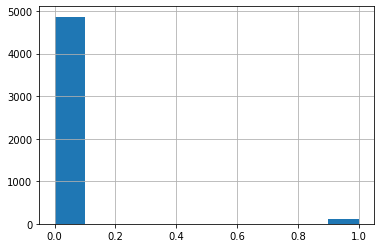

In [ ]:
r_df['أصالة'].hist()

In [ ]:
r_df['أصالة'].value_counts()

0    4867
1     102
Name: أصالة, dtype: int64

#Upsampling the Data

In [ ]:

# -*- coding: utf-8 -*-
# Importing required Library
import numpy as np
import pandas as pd
import random
from sklearn.datasets import make_classification
from sklearn.neighbors import NearestNeighbors

def create_dataset(n_sample=1000):
    ''' 
    Create a unevenly distributed sample data set multilabel  
    classification using make_classification function
    
    args
    nsample: int, Number of sample to be created
    
    return
    X: pandas.DataFrame, feature vector dataframe with 10 features 
    y: pandas.DataFrame, target vector dataframe with 5 labels
    '''
    X, y = make_classification(n_classes=5, class_sep=2, 
                           weights=[0.1,0.025, 0.205, 0.008, 0.9], n_informative=3, n_redundant=1, flip_y=0,
                           n_features=10, n_clusters_per_class=1, n_samples=1000, random_state=10)
    y = pd.get_dummies(y, prefix='class')
    return pd.DataFrame(X), y

def get_tail_label(df):
    """
    Give tail label colums of the given target dataframe
    
    args
    df: pandas.DataFrame, target label df whose tail label has to identified
    
    return
    tail_label: list, a list containing column name of all the tail label
    """
    columns = df.columns
    n = len(columns)
    irpl = np.zeros(n)
    for column in range(n):
        irpl[column] = df[columns[column]].value_counts()[1]
    irpl = max(irpl)/irpl
    mir = np.average(irpl)
    tail_label = []
    for i in range(n):
        if irpl[i] > mir:
            tail_label.append(columns[i])
    return tail_label

def get_index(df):
  """
  give the index of all tail_label rows
  args
  df: pandas.DataFrame, target label df from which index for tail label has to identified
    
  return
  index: list, a list containing index number of all the tail label
  """
  tail_labels = get_tail_label(df)
  index = set()
  for tail_label in tail_labels:
    sub_index = set(df[df[tail_label]==1].index)
    index = index.union(sub_index)
  return list(index)

def get_minority_instace(X, y):
    """
    Give minority dataframe containing all the tail labels
    
    args
    X: pandas.DataFrame, the feature vector dataframe
    y: pandas.DataFrame, the target vector dataframe
    
    return
    X_sub: pandas.DataFrame, the feature vector minority dataframe
    y_sub: pandas.DataFrame, the target vector minority dataframe
    """
    index = get_index(y)
    X_sub = X[X.index.isin(index)].reset_index(drop = True)
    y_sub = y[y.index.isin(index)].reset_index(drop = True)
    return X_sub, y_sub

def nearest_neighbour(X):
    """
    Give index of 5 nearest neighbor of all the instance
    
    args
    X: np.array, array whose nearest neighbor has to find
    
    return
    indices: list of list, index of 5 NN of each element in X
    """
    nbs=NearestNeighbors(n_neighbors=5,metric='euclidean',algorithm='kd_tree').fit(X)
    euclidean,indices= nbs.kneighbors(X)
    return indices

def MLSMOTE(X,y, n_sample):
    """
    Give the augmented data using MLSMOTE algorithm
    
    args
    X: pandas.DataFrame, input vector DataFrame
    y: pandas.DataFrame, feature vector dataframe
    n_sample: int, number of newly generated sample
    
    return
    new_X: pandas.DataFrame, augmented feature vector data
    target: pandas.DataFrame, augmented target vector data
    """
    indices2 = nearest_neighbour(X)
    n = len(indices2)
    new_X = np.zeros((n_sample, X.shape[1]))
    target = np.zeros((n_sample, y.shape[1]))
    for i in range(n_sample):
        reference = random.randint(0,n-1)
        neighbour = random.choice(indices2[reference,1:])
        all_point = indices2[reference]
        nn_df = y[y.index.isin(all_point)]
        ser = nn_df.sum(axis = 0, skipna = True)
        target[i] = np.array([1 if val>2 else 0 for val in ser])
        ratio = random.random()
        gap = X.loc[reference,:] - X.loc[neighbour,:]
        new_X[i] = np.array(X.loc[reference,:] + ratio * gap)
    new_X = pd.DataFrame(new_X, columns=X.columns)
    target = pd.DataFrame(target, columns=y.columns)
    new_X = pd.concat([X, new_X], axis=0)
    target = pd.concat([y, target], axis=0)
    return new_X, target

#if __name__=='main':
    """
    main function to use the MLSMOTE
    """
    #X, y = create_dataset()                     #Creating a Dataframe
 #   X_sub, y_sub = get_minority_instace(x_train, y_train)   #Getting minority instance of that datframe
 #   X_res,y_res =MLSMOTE(X_sub, y_sub, 100)     #Applying MLSMOTE to augment the dataframe

In [ ]:
X_sub, y_sub = get_minority_instace(X, y)

In [ ]:
X_res,y_res =MLSMOTE(X_sub, y_sub, 12000)

In [ ]:
X = pd.concat([X, X_res], axis = 0)
y = pd.concat([y, y_res], axis = 0)

In [ ]:
y['أصالة'].value_counts()

0.0    15695
1.0     1775
Name: أصالة, dtype: int64

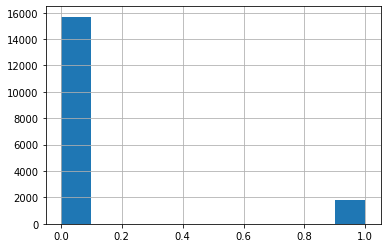

In [ ]:
y['أصالة'].hist()

In [ ]:
y.shape

(17470, 17)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.utils import shuffle


forest = RandomForestClassifier()
multi_target_forest = MultiOutputClassifier(forest, n_jobs=-1)
clf = multi_target_forest.fit(X_train, y_train)

In [ ]:
#clf_tune = multi_target_forest.fit(X_train, y_train , epochs = 100, batch_size=50)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_demo = clf.predict(demo_df_final)

In [ ]:
y_demo

array([[0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
        0.]])

In [ ]:
all_labels.columns[np.where(y_demo==1)[1]]

Index(['أفكار', 'احتجاج', 'النشاط الرقمي', 'حرية التعبير', 'حقوق الإنسان',
       'صحافة المواطن'],
      dtype='object')

In [ ]:
all_labels.columns

In [ ]:
from sklearn.metrics import hamming_loss, accuracy_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_samples = f1_score(y_test, y_pred, average='samples')

hamming = hamming_loss(y_test, y_pred)

print("Exact Match Ratio", accuracy)
print("F1-Score Weighted", f1_weighted)
print("F1-Score Samples", f1_samples)
print("hamming: ", hamming)

Exact Match Ratio 0.7507155123068117
F1-Score Weighted 0.8744588045043202
F1-Score Samples 0.8394955824342513
hamming:  0.034007879053166774


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1515: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  average, "true nor predicted", 'F-score is', len(true_sum)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

pipeline = Pipeline([
    ('clf', MultiOutputClassifier(RandomForestClassifier()))
])

parameters = [
    {"clf": [RandomForestClassifier()],
     "clf__n_estimators": [10, 100, 250],
     "clf__max_depth":[8],
     "clf__random_state":[42]}
]

rkf = RepeatedKFold(
    n_splits=10,
    n_repeats=2,
    random_state=42
)

cv = GridSearchCV(
    pipeline,
    parameters,
    cv=rkf,
    scoring='accuracy',
    n_jobs=-1)

In [ ]:
from sklearn.model_selection import GridSearchCV


model = MultiOutputClassifier(forest, n_jobs=-1, )
grid = GridSearchCV(estimator=model, param_grid=parameters, cv=cv)
#grid = GridSearchCV(estimator=model, param_grid=parameters)
#grid_result = grid.fit(X_train, y_train)

In [ ]:
y_test_new = y_test.reset_index()

In [ ]:
y_test_new = y_test_new.drop(['index'],axis = 1)

In [ ]:
y_test_new

,COVID-19,آداب,أصالة,أفكار,أفلام,احتجاج,الإعلام والصحافة,النساء والنوع,النشاط الرقمي,تقنية,حروب ونزاعات,حرية التعبير,حقوق الإنسان,حكم,سياسة,صحافة المواطن,فنون وثقافة
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0
3490,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3491,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3492,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
y_pred[13]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.])